## Load In Dependencies

To run this demonstration notebook, you will need to have the following packages imported below installed. This may take some time.  

In [ ]:
### Run this cell only once.
%pip install ultralytics
%pip install opencv-python-headless
%pip install labelme2yolo
%pip install rasterio
%pip install gdal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# !labelme2yolo --json_dir /path/to/labelme_json_dir/
!labelme2yolo --json_dir "/content/drive/MyDrive/XBDDataset"

INFO:labelme2yolo:Searching label list from json files ...
INFO:labelme2yolo:Converting train set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting val set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting test set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


In [ ]:
#Loading the model
model = YOLO('yolov9c.pt')
# Display model information (optional)
model.info()

100%|██████████| 49.4M/49.4M [00:00<00:00, 470MB/s]


YOLOv9c summary: 618 layers, 25,590,912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [ ]:
#train model and save result
results = model.train(data="/content/drive/MyDrive/XBD Dataset/data.yaml", epochs=200, imgsz=512, project='/content/drive/MyDrive/pre-trained', name='experiment3_100epochs')

Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/XBD Dataset/data.yaml, epochs=200, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/pre-trained, name=experiment4_200epochs_640_20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

100%|██████████| 755k/755k [00:00<00:00, 108MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 341MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/XBD Dataset/train/labels.cache... 9771 images, 59 backgrounds, 0 corrupt: 100%|██████████| 9771/9771 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/XBD Dataset/train/images/1211_png.rf.44ffccd21f4f21848f9643be5946d16f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/XBD Dataset/train/images/1211_png.rf.47d0fd808e5e372e311b5f2c9aee5288.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/XBD Dataset/train/images/1224_png.rf.4059bc3123999244e188d735e3a86aa7.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/XBD Dataset/train/images/1224_png.rf.fb04630a10b9fc50c4e71880c7fc3329.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/XBD Dataset/train/images/1582_png.rf.079950d61ae7d6e04095afe2d0aa82b2.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/XBD Dataset/val/labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/pre-trained/experiment4_200epochs_640_20/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/pre-trained/experiment4_200epochs_640_20
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200        26G      2.008      1.505      1.242        456        640: 100%|██████████| 611/611 [04:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

                   all         77       4627      0.573      0.129      0.141     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      30.2G      1.841      1.141      1.152        679        640: 100%|██████████| 611/611 [01:57<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         77       4627      0.157      0.242      0.165     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      32.5G      1.863      1.159      1.159        370        640: 100%|██████████| 611/611 [01:55<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         77       4627      0.169      0.226      0.161     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      31.1G      1.876      1.145      1.158       1134        640: 100%|██████████| 611/611 [01:54<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         77       4627       0.17      0.269      0.169     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      25.7G      1.839      1.103       1.15        975        640: 100%|██████████| 611/611 [01:54<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         77       4627      0.174      0.226      0.155     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      25.1G      1.806      1.071      1.133       1088        640: 100%|██████████| 611/611 [01:55<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         77       4627      0.215      0.263      0.183     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      27.5G      1.782      1.043      1.128       1325        640: 100%|██████████| 611/611 [01:55<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         77       4627        0.2      0.259      0.178     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      27.3G      1.761      1.021      1.119        819        640: 100%|██████████| 611/611 [01:54<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         77       4627      0.245      0.279      0.185     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      33.2G      1.748      1.004      1.113        836        640: 100%|██████████| 611/611 [01:54<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         77       4627      0.221      0.268      0.191     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      35.1G      1.729     0.9919      1.108        746        640: 100%|██████████| 611/611 [01:54<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         77       4627      0.239      0.275      0.212      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      30.4G      1.724     0.9783      1.107        820        640: 100%|██████████| 611/611 [01:55<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         77       4627      0.264      0.288      0.222      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      28.9G      1.702     0.9626        1.1        944        640: 100%|██████████| 611/611 [01:54<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         77       4627      0.258      0.307      0.233      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      22.4G      1.697      0.952      1.097        606        640: 100%|██████████| 611/611 [01:54<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         77       4627       0.25       0.29      0.216       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      28.7G      1.677     0.9423      1.093        964        640: 100%|██████████| 611/611 [01:54<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         77       4627      0.256      0.288      0.228      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      26.1G       1.66     0.9262      1.082       2037        640: 100%|██████████| 611/611 [01:55<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         77       4627      0.257      0.298       0.22      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      28.9G      1.655     0.9202      1.082        535        640: 100%|██████████| 611/611 [01:54<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         77       4627      0.261      0.287      0.231      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      23.7G       1.64     0.9096       1.08       1491        640: 100%|██████████| 611/611 [01:54<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         77       4627      0.254      0.304      0.229      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200        32G      1.629     0.8983      1.077       1252        640: 100%|██████████| 611/611 [01:54<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         77       4627       0.27       0.29      0.225      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200        34G      1.617     0.8898      1.072        812        640: 100%|██████████| 611/611 [01:54<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         77       4627      0.277      0.319      0.238       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      27.7G      1.627      0.898      1.075       1151        640: 100%|██████████| 611/611 [01:54<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         77       4627        0.3      0.309       0.23      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      27.3G       1.61     0.8846       1.07       2371        640: 100%|██████████| 611/611 [01:54<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         77       4627      0.287      0.314      0.234      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      34.9G      1.615      0.885      1.069        677        640: 100%|██████████| 611/611 [01:55<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         77       4627      0.322      0.304      0.247      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      31.6G      1.599     0.8732      1.067       1007        640: 100%|██████████| 611/611 [01:54<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         77       4627      0.286       0.31      0.238      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      32.3G      1.591     0.8635      1.061       1347        640: 100%|██████████| 611/611 [01:55<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         77       4627      0.293      0.309      0.232      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      17.2G       1.58     0.8563       1.06        787        640: 100%|██████████| 611/611 [01:55<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         77       4627      0.333      0.296      0.231      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      35.3G      1.578     0.8554      1.058       1479        640: 100%|██████████| 611/611 [01:55<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         77       4627      0.293      0.302      0.228      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      27.9G      1.566     0.8497      1.062       1158        640: 100%|██████████| 611/611 [01:54<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         77       4627      0.326       0.31      0.249      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200        22G      1.561     0.8453      1.057       1233        640:  96%|█████████▌| 584/611 [01:49<00:04,  5.46it/s]

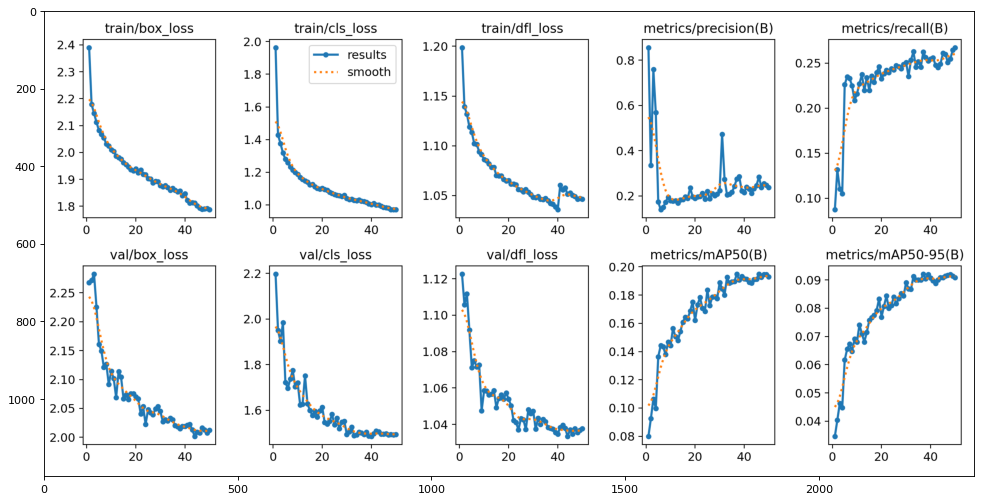

In [ ]:
figure(figsize=(15, 10), dpi=80)
# reading the image
results = img.imread('/content/drive/MyDrive/pre-trained/experiment2/results.png')
# displaying the image
plt.imshow(results)

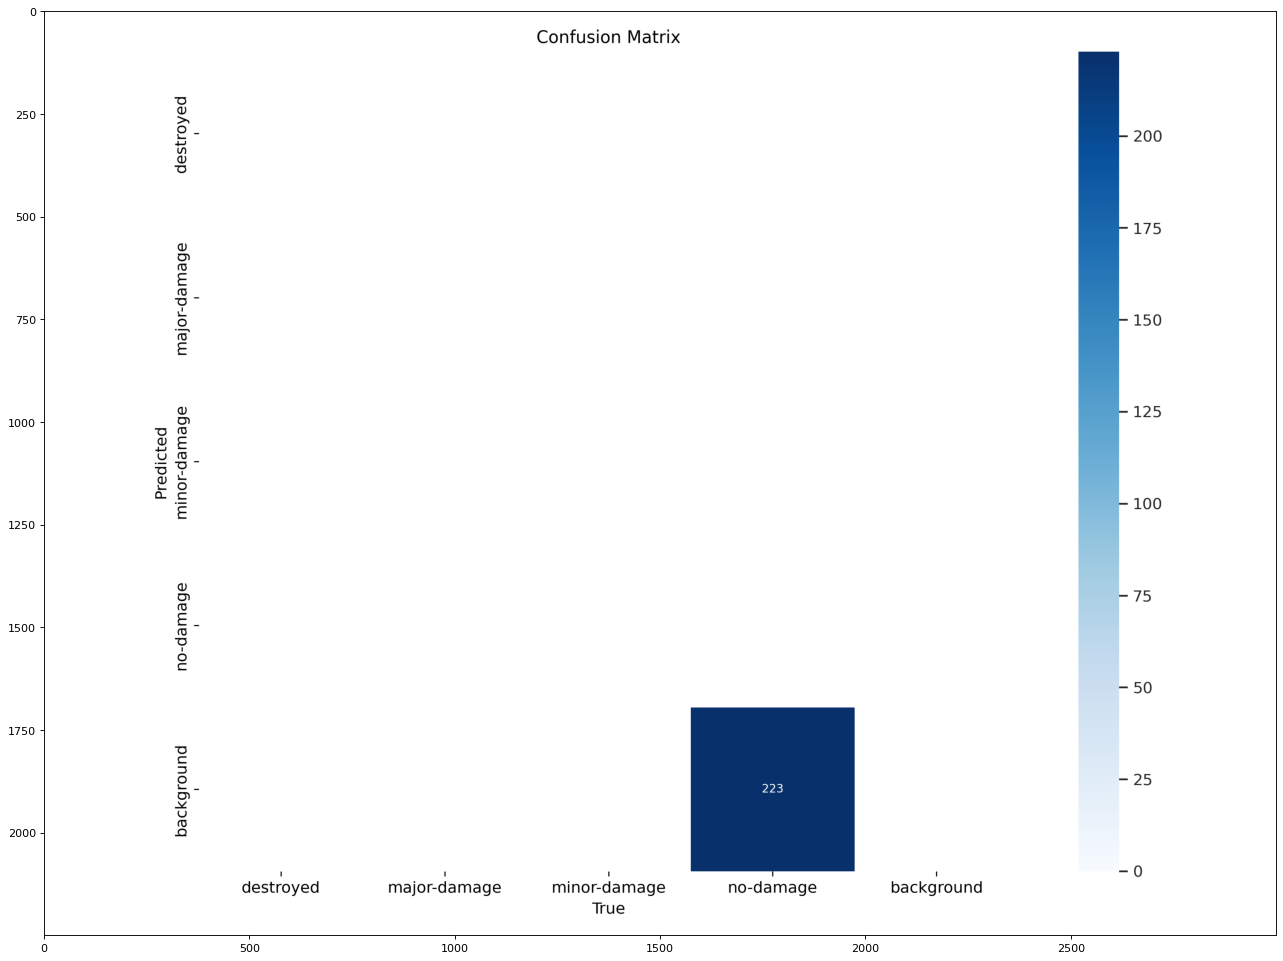

In [ ]:
figure(figsize=(20,15), dpi=80)
# reading the image
cf = img.imread('runs/detect/train7/confusion_matrix.png')
# displaying the image
plt.imshow(cf)

In [ ]:
#Loading the model
model_1 = YOLO('yolov8n-obb.pt')
# Display model information (optional)
model_1.info()

YOLOv8n-obb summary: 250 layers, 3,085,440 parameters, 0 gradients, 8.5 GFLOPs


(250, 3085440, 0, 8.456768)

In [ ]:
figure(figsize=(15, 10), dpi=80)
# reading the image
results = img.imread('runs/obb/train')
# displaying the image
plt.imshow(results)

FileNotFoundError: [Errno 2] No such file or directory: 'runs/obb/train'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Train the model on the dataset for 50 epochs
results_1 = model_1.train(data="/content/drive/MyDrive/Trial Training/YOLODataset/dataset.yaml", epochs=50, imgsz=512)

Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/drive/MyDrive/Trial Training/YOLODataset/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /content/drive/MyDrive/Trial Training/YOLODataset/labels/train.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Trial Training/YOLODataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]

Plotting labels to runs/obb/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/obb/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.102      4.266      2.361         64        512: 100%|██████████| 4/4 [00:50<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.11s/it]

                   all         12        425      0.016    0.00493    0.00875    0.00498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.065      4.264      2.382         82        512: 100%|██████████| 4/4 [00:34<00:00,  8.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.59s/it]

                   all         12        425     0.0318     0.0211     0.0181    0.00489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.879      3.992      2.237         22        512: 100%|██████████| 4/4 [00:31<00:00,  8.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]

                   all         12        425     0.0553     0.0529     0.0355     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.728      3.886      1.988         67        512: 100%|██████████| 4/4 [00:32<00:00,  8.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.57s/it]

                   all         12        425     0.0755      0.056     0.0559     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.598      3.341      1.879         48        512: 100%|██████████| 4/4 [00:30<00:00,  7.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.12s/it]

                   all         12        425     0.0533      0.068     0.0494     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.561      3.338       1.84         73        512: 100%|██████████| 4/4 [00:32<00:00,  8.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.72s/it]

                   all         12        425     0.0603      0.056      0.045     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G       1.56      3.143      1.721        152        512: 100%|██████████| 4/4 [00:31<00:00,  7.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.38s/it]

                   all         12        425      0.588     0.0558     0.0478     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.449       2.73      1.721        109        512: 100%|██████████| 4/4 [00:32<00:00,  8.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.98s/it]

                   all         12        425     0.0882      0.055     0.0494     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.484       2.37      1.732         29        512: 100%|██████████| 4/4 [00:32<00:00,  8.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.52s/it]

                   all         12        425      0.235     0.0605     0.0479     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.381      2.308        1.6        110        512: 100%|██████████| 4/4 [00:31<00:00,  7.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.34s/it]

                   all         12        425     0.0672     0.0648     0.0493     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.355      1.963       1.68         30        512: 100%|██████████| 4/4 [00:31<00:00,  7.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.60s/it]

                   all         12        425     0.0816     0.0648     0.0613     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.373      2.061      1.565        138        512: 100%|██████████| 4/4 [00:31<00:00,  7.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.79s/it]

                   all         12        425     0.0877      0.056      0.068     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.333      1.968      1.673         66        512: 100%|██████████| 4/4 [00:31<00:00,  7.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]

                   all         12        425     0.0634     0.0804     0.0574     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.317       1.79      1.685        118        512: 100%|██████████| 4/4 [00:30<00:00,  7.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.54s/it]

                   all         12        425     0.0899      0.056     0.0674     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.209      1.822       1.63         42        512: 100%|██████████| 4/4 [00:31<00:00,  7.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.74s/it]

                   all         12        425     0.0594     0.0839     0.0571     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.261      1.726      1.702         63        512: 100%|██████████| 4/4 [00:30<00:00,  7.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

                   all         12        425       0.07     0.0804     0.0663     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.166      1.626       1.54         87        512: 100%|██████████| 4/4 [00:30<00:00,  7.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.48s/it]

                   all         12        425     0.0613     0.0839     0.0577     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.143       1.54      1.592         55        512: 100%|██████████| 4/4 [00:31<00:00,  7.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]

                   all         12        425     0.0799     0.0839     0.0624     0.0488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.25      1.659      1.564        120        512: 100%|██████████| 4/4 [00:32<00:00,  8.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.68s/it]

                   all         12        425      0.519      0.091     0.0913     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.167      1.443      1.561         58        512: 100%|██████████| 4/4 [00:30<00:00,  7.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]

                   all         12        425      0.511     0.0628     0.0601     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.076       1.52      1.473        125        512: 100%|██████████| 4/4 [00:31<00:00,  7.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.33s/it]

                   all         12        425      0.507      0.119     0.0936     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.115      1.428      1.513        108        512: 100%|██████████| 4/4 [00:30<00:00,  7.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.63s/it]

                   all         12        425      0.526      0.128     0.0936     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.263      1.517      1.661         45        512: 100%|██████████| 4/4 [00:31<00:00,  7.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.39s/it]

                   all         12        425      0.529      0.117     0.0945     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.127      1.446      1.629         55        512: 100%|██████████| 4/4 [00:30<00:00,  7.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.58s/it]

                   all         12        425      0.543      0.107     0.0996     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.095       1.58      1.559         39        512: 100%|██████████| 4/4 [00:32<00:00,  8.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.52s/it]

                   all         12        425      0.529     0.0716     0.0695     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.046      1.346      1.512         93        512: 100%|██████████| 4/4 [00:30<00:00,  7.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.51s/it]

                   all         12        425      0.569     0.0952      0.101     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.053      1.424      1.454         35        512: 100%|██████████| 4/4 [00:31<00:00,  7.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.09s/it]

                   all         12        425      0.493     0.0725     0.0717     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.093      1.371      1.573         63        512: 100%|██████████| 4/4 [00:31<00:00,  7.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.50s/it]

                   all         12        425      0.747      0.104      0.108     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.058      1.284      1.608         58        512: 100%|██████████| 4/4 [00:31<00:00,  7.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.23s/it]

                   all         12        425      0.602      0.104      0.109     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.029      1.311      1.535        114        512: 100%|██████████| 4/4 [00:31<00:00,  7.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.30s/it]

                   all         12        425      0.424      0.107      0.107      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.075       1.35      1.576         64        512: 100%|██████████| 4/4 [00:31<00:00,  7.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.51s/it]

                   all         12        425      0.412      0.106      0.107     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G       1.07       1.36      1.528         58        512: 100%|██████████| 4/4 [00:32<00:00,  8.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.94s/it]

                   all         12        425      0.405      0.106      0.104     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.027      1.334      1.568        112        512: 100%|██████████| 4/4 [00:30<00:00,  7.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.38s/it]

                   all         12        425      0.402      0.104      0.103     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.106      1.347      1.491        127        512: 100%|██████████| 4/4 [00:32<00:00,  8.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.67s/it]

                   all         12        425      0.349      0.108      0.106     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.9992       1.26      1.524         97        512: 100%|██████████| 4/4 [00:31<00:00,  7.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.43s/it]

                   all         12        425      0.378      0.122      0.105     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      0.996      1.251       1.46        115        512: 100%|██████████| 4/4 [00:30<00:00,  7.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.71s/it]

                   all         12        425      0.367      0.127      0.104     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.9865      1.594      1.532         18        512: 100%|██████████| 4/4 [00:32<00:00,  8.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.85s/it]

                   all         12        425      0.374      0.127     0.0997     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9534       1.27      1.498         48        512: 100%|██████████| 4/4 [00:32<00:00,  8.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.82s/it]

                   all         12        425      0.393      0.127     0.0988     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.054      1.306      1.578         37        512: 100%|██████████| 4/4 [00:31<00:00,  7.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.55s/it]

                   all         12        425      0.365      0.127     0.0989       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9925      1.263      1.579         47        512: 100%|██████████| 4/4 [00:32<00:00,  8.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.32s/it]

                   all         12        425      0.355      0.127     0.0995     0.0808


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9297      1.256      1.478         69        512: 100%|██████████| 4/4 [00:42<00:00, 10.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.47s/it]

                   all         12        425      0.514      0.056      0.083     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9193      1.264      1.484         68        512: 100%|██████████| 4/4 [00:29<00:00,  7.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.36s/it]

                   all         12        425      0.357      0.128     0.0998     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9217      1.428      1.424         33        512: 100%|██████████| 4/4 [00:29<00:00,  7.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.87s/it]

                   all         12        425      0.357      0.128     0.0981     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9096      1.256      1.481         91        512: 100%|██████████| 4/4 [00:28<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.07s/it]

                   all         12        425      0.359      0.128     0.0978     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9191      1.254      1.513         41        512: 100%|██████████| 4/4 [00:29<00:00,  7.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.78s/it]

                   all         12        425      0.358      0.128     0.0995      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      0.907      1.219      1.451         38        512: 100%|██████████| 4/4 [00:28<00:00,  7.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.27s/it]

                   all         12        425      0.357      0.128     0.0988     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9643      1.329      1.605         29        512: 100%|██████████| 4/4 [00:28<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]

                   all         12        425      0.355      0.128     0.0993     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9436       1.22      1.524         95        512: 100%|██████████| 4/4 [00:27<00:00,  6.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.90s/it]

                   all         12        425      0.355      0.128     0.0989     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9057      1.208      1.438         59        512: 100%|██████████| 4/4 [00:29<00:00,  7.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.64s/it]

                   all         12        425      0.359      0.139     0.0997     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9981      1.212      1.421         99        512: 100%|██████████| 4/4 [00:28<00:00,  7.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.72s/it]

                   all         12        425      0.359      0.139     0.0987     0.0811



50 epochs completed in 0.558 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.7MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.7MB

Validating runs/obb/train/weights/best.pt...
Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-obb summary (fused): 187 layers, 3,078,584 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.66s/it]


                   all         12        425       0.76     0.0592     0.0735     0.0605
majordamagedresidentialbuilding         12        210      0.558      0.102      0.135      0.109
minordamagedresidentialbuilding         12        169      0.376     0.0947     0.0999     0.0795
destroyedresidentialbuilding          6         16          1          0     0.0229     0.0118
undamagedresidentialbuilding          7         19      0.623      0.158      0.183      0.163
majordamagedcommercialbuilding          4          6          1          0          0          0
minordamagedcommercialbuilding          4          5          1          0          0          0
Speed: 1.5ms preprocess, 213.3ms inference, 0.0ms loss, 217.4ms postprocess per image
Results saved to runs/obb/train
